In [83]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd

### 1
Пусть t — значение статистики критерия Стьюдента для независимых выборок, nu — соответствующее число степеней свободы. Какая из строчек кода вычисляет достигаемый уровень значимости t-критерия при альтернативе **$H_1:\mu_1 > \mu_2$?**

- 1-stats.t.cdf(abs(t), nu)

---
---
### 2
Выберите ситуации, в которых допустимо проверять нулевую гипотезу $H_0:\mu_1=\mu_2$ против односторонней альтернативы $H_1:\mu_1 > \mu_2$

- В полученных выборках $\overline{X}_1 > \overline{X}_2 $ - 


- Признаки устроены так, что $\mu_1<\mu_2$ в принципе невозможно $\large\checkmark$


- Случай $\mu_1<\mu_2$ нас не интересует: например, если $X_1$ — это эффективность изобретённого нами лекарства, а $X_2$ — эффективность плацебо, не в наших интересах брать двустороннюю альтернативу, потому что мы не хотим ненароком показать, что лекарство хуже плацебо -



---
---
### 3
Выберите верные утверждения о проблеме Беренца-Фишера.


- Проблема заключается в том, что при сравнении средних двух выборок с неизвестными дисперсиями нельзя даже приближённо посчитать число степеней свободы у нулевого распределения t-критерия - 


- Проблема заключается в том, что не существует точного способа сравнить средние двух выборок с неизвестными дисперсиями $\large\checkmark$


- Приближённое решение проблемы Беренца-Фишера достаточно точно при $\left[n_1>n_2\right] = \left[\sigma_1<\sigma_2\right]$


- Приближённое решение проблемы Беренца-Фишера достаточно точно при $n_1=n_2$ $\large\checkmark$


---
---
### 4
Уровень кальция в крови здоровых молодых женщин равен в среднем 9.5 милиграммам на децилитр и имеет характерное стандартное отклонение 0.4 мг/дл. В сельской больнице Гватемалы для 160 здоровых беременных женщин при первом обращении для ведения беременности был измерен уровень кальция; среднее значение составило 9.57 мг/дл. Можно ли утверждать, что средний уровень кальция в этой популяции отличается от 9.5?

**Посчитайте достигаемый уровень значимости**. Поскольку известны только среднее и дисперсия, а не сама выборка, нельзя использовать стандартные функции критериев — нужно реализовать формулу достигаемого уровня значимости самостоятельно.

Округлите ответ до четырёх знаков после десятичной точки.




In [48]:
mean_1 = 9.5
sigma_1 = 0.4

n2 = 160
mean_2 = 9.57
sigma_2 = 0.4 / n2**0.5

delta = 0.07

In [49]:
delta

0.07

$H_0$ - средний уровень эксперимента, $\overline{X}_1 = \overline{X}_0  = 9.5$

$H_1$ - $\overline{X}_1 \ne \overline{X}_0$

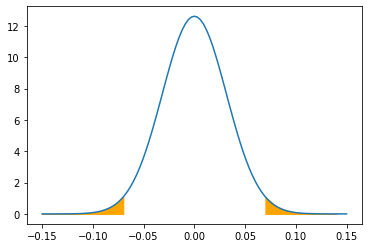

In [65]:
func = stats.norm(0, sigma_2)

a = 0.15
x = np.linspace(-a, a, 101)

plt.plot(x, func.pdf(x))
plt.fill_between(np.arange(delta, a, 0.01), func.pdf(np.arange(delta, a, 0.01)), color="orange");
plt.fill_between(np.arange(-a, -delta+0.01, 0.01), func.pdf(np.arange(-a, -delta+0.01, 0.01)), color="orange");

In [77]:
func.cdf(-delta) + 1 - func.cdf(delta)

0.026856695507524453

In [73]:
p = 2*(1 - func.cdf(abs(delta)))
round(p, 4)

0.0269

---
---
### 5
Как вы считаете, это отличие в среднем уровне кальция в крови практически значимо?


- Нет, раз критерий Стьюдента говорит, что отличие незначимо


- Да, раз критерий Стьюдента говорит, что отличие значимо


- Скорее всего нет: стандартное отклонение уровня в популяции намного больше полученного различия между средними  $\large\checkmark$



In [76]:
delta, sigma_1

(0.07, 0.4)

---
---
### 6
Имеются данные о стоимости и размерах 53940 бриллиантов:

Отделите 25% случайных наблюдений в тестовую выборку с помощью функции sklearn.cross_validation.train_test_split (зафиксируйте random state = 1). На обучающей выборке настройте две регрессионные модели:

1. линейную регрессию с помощью LinearRegression без параметров


2. случайный лес с помощью RandomForestRegressor с random_state=1.


Какая из моделей лучше предсказывает цену бриллиантов? Сделайте предсказания на тестовой выборке, посчитайте модули отклонений предсказаний от истинных цен. Проверьте гипотезу об одинаковом среднем качестве предсказаний, вычислите достигаемый уровень значимости. Отвергается ли гипотеза об одинаковом качестве моделей против двусторонней альтернативы на уровне значимости $\alpha=0.05$?

- **Отвергается, $p<\alpha$**

In [ ]:
stats.ttest_rel(abs(y_test - lm.predict(X_test)), 
                abs(y_test - rf.predict(X_test)))

In [84]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [88]:
df = pd.read_csv("diamonds.txt", sep="\t")

In [89]:
df.head()
y = df.price

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [99]:
from sklearn.model_selection import train_test_split
np.random.seed(1)

X_train, X_test, \
    y_train, y_test = train_test_split(df.drop("price", axis=1),
                                       df.price,
                                       random_state=1, train_size = 0.75
                                      )

In [100]:
lineReg = LinearRegression().fit(X_train, y_train)

In [109]:
res_line = lineReg.predict(X_test)

In [102]:
randFor = RandomForestRegressor(random_state=1).fit(X_train, y_train)

D:\Anaconda3\envs\py36_R\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [111]:
res_forest = randFor.predict(X_test)

In [112]:
stats.ttest_rel(abs(y_test - res_line), 
                abs(y_test - res_forest)).pvalue

1.6551745751413995e-38

---
---
### 7
В предыдущей задаче посчитайте 95% доверительный интервал для разности средних абсолютных ошибок предсказаний регрессии и случайного леса. Чему равна его ближайшая к нулю граница? Округлите до десятков (поскольку случайный лес может давать немного разные предсказания в зависимости от версий библиотек, мы просим вас так сильно округлить, чтобы полученное значение наверняка совпало с нашим).

- 70

In [141]:
from statsmodels.stats.weightstats import DescrStatsW
res = abs(y_test - res_line) - abs(y_test - res_forest)
DescrStatsW(res).tconfint_mean()

(74.28724532595444, 100.62452098634296)

In [140]:
int(round(DescrStatsW(res).tconfint_mean()[0], -1))

70